In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os
import re
import pickle

from IPython.display import display, HTML
from tqdm.auto import tqdm

sns.set(style="darkgrid")  # seaborn 스타일 설정

%matplotlib inline
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import re
import pandas as pd
motion = []
def get_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else None

path = 'motion-and-heart-rate-from-a-wrist-worn-wearable-and-labeled-sleep-from-polysomnography-1.0.0/motion'
file_list = os.listdir(path)
file_list_txt = sorted([file for file in file_list if get_number(file) is not None], key=get_number)

for I in file_list_txt:
    df = pd.read_csv(os.path.join(path, I), sep=' ', header=None, names=['time', 'x', 'y', 'z'])
    motion.append(df)
df

,time,x,y,z
0,-563.032824,0.052033,-0.612061,-0.781113
1,-563.014347,0.055008,-0.605698,-0.785004
2,-562.995023,0.053024,-0.608139,-0.783569
3,-562.984044,0.048141,-0.610611,-0.788055
4,-562.964345,0.049652,-0.608643,-0.790497
...,...,...,...,...
1709995,29566.218889,0.332993,0.339142,0.885254
1709996,29566.220181,0.335480,0.337677,0.884323
1709997,29566.221054,0.333023,0.337677,0.883301
1709998,29566.221875,0.332504,0.335236,0.885742


In [3]:
import os
import re
import pandas as pd

def get_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else None

heart_rate = []
path = 'motion-and-heart-rate-from-a-wrist-worn-wearable-and-labeled-sleep-from-polysomnography-1.0.0/heart_rate'
file_list = os.listdir(path)
file_list_txt = sorted([file for file in file_list if get_number(file) is not None], key=get_number)

for i in file_list_txt:
    df = pd.read_csv(os.path.join(path, i), header=None, names=['time', 'bpm'])
    heart_rate.append(df)

df

,time,bpm
0,-54171.73757,77
1,-53789.74320,81
2,-53332.83677,74
3,-53077.83538,67
4,-52865.83576,76
...,...,...
15988,29050.53076,89
15989,29120.40579,140
15990,29122.40576,141
15991,29205.40576,197


In [4]:
label = []
path = 'motion-and-heart-rate-from-a-wrist-worn-wearable-and-labeled-sleep-from-polysomnography-1.0.0/labels'
file_list = os.listdir(path)
file_list_txt = sorted([file for file in file_list if get_number(file) is not None], key=get_number)

for i in file_list_txt:
    df = pd.read_csv(os.path.join(path, i), sep=' ', header=None, names=['time', 'label'])
    label.append(df)


In [5]:
step = []
path = 'motion-and-heart-rate-from-a-wrist-worn-wearable-and-labeled-sleep-from-polysomnography-1.0.0/steps'
file_list = os.listdir(path)
file_list_txt = sorted([file for file in file_list if get_number(file) is not None], key=get_number)

for i in file_list_txt:
    df = pd.read_csv(os.path.join(path, i), sep=',', header=None, names=['time', 'step'])
    step.append(df)
step

[        time  step
 0    -604539     0
 1    -603939     0
 2    -603339     0
 3    -602739     0
 4    -602139     0
 ...      ...   ...
 1398  234261     0
 1399  234861     0
 1400  235461     0
 1401  236061   219
 1402  236661     0
 
 [1403 rows x 2 columns],
         time  step
 0    -604422     0
 1    -603822     0
 2    -603222     0
 3    -602622     0
 4    -602022     0
 ...      ...   ...
 1002   -3222     0
 1003   -2622     0
 1004   -2022   115
 1005   -1422     0
 1006    -822    52
 
 [1007 rows x 2 columns],
        time  step
 0   -473712   172
 1   -473112     0
 2   -472512    85
 3   -471912    19
 4   -471312    43
 ..      ...   ...
 744  -27312   159
 745  -26712     0
 746  -26112   463
 747  -25512   325
 748  -24912    75
 
 [749 rows x 2 columns],
         time  step
 0    -604770     0
 1    -604170    13
 2    -603570     0
 3    -602970     0
 4    -602370     0
 ...      ...   ...
 1361  211830     0
 1362  212430     0
 1363  213030    49
 1364  21

# motion값 preprocessing

In [6]:
from scipy.signal import butter, filtfilt

# 샘플링 주파수와 절반 주파수 설정
fs = 10 
fn = fs/2

band_motion = []
col_names = ['x', 'y', 'z']

for i in range(len(motion)):
    sub = motion[i].drop('time' ,axis=1)

    # 밴드 필터링된 데이터 배열 초기화
    band_data = np.zeros(sub.shape)

    # 각 채널에 대해 필터링 수행
    for ch in range(3):
        x = sub.iloc[:, ch]
        b, a = butter(3, 0.5 / fn, btype='high')
        band_data[:, ch] = filtfilt(b, a, x) 
    
    # 밴드 필터링된 데이터를 데이터프레임 형식으로 변환
    df = pd.DataFrame(band_data, columns=col_names)
    
    # 시간 컬럼 추가
    res = pd.concat([motion[i]['time'], df], axis=1)
    band_motion.append(res)
band_motion

[                 time         x         y         z
 0      -124489.161050 -0.000193  0.000295  0.000231
 1      -124489.116395  0.000224 -0.003133 -0.002445
 2      -124489.115548  0.001090  0.005249 -0.007707
 3      -124489.114691 -0.001526  0.004942 -0.005789
 4      -124489.097700 -0.005133 -0.001598  0.001742
 ...               ...       ...       ...       ...
 981995   17642.967007 -0.000786 -0.002340 -0.000524
 981996   17642.987576  0.002283  0.001078 -0.002586
 981997   17643.006946  0.002393 -0.000898  0.000708
 981998   17643.026865  0.000072 -0.000494 -0.001909
 981999   17643.046417  0.000161 -0.000081 -0.000140
 
 [982000 rows x 4 columns],
                  time         x         y         z
 0       -25277.015599  0.002016 -0.003835  0.001159
 1       -25276.988283 -0.007503 -0.062236 -0.032621
 2       -25276.987249  0.002873 -0.006332 -0.016107
 3       -25276.984253  0.014710 -0.013022 -0.045417
 4       -25276.964378  0.034223 -0.013243 -0.032749
 ...            

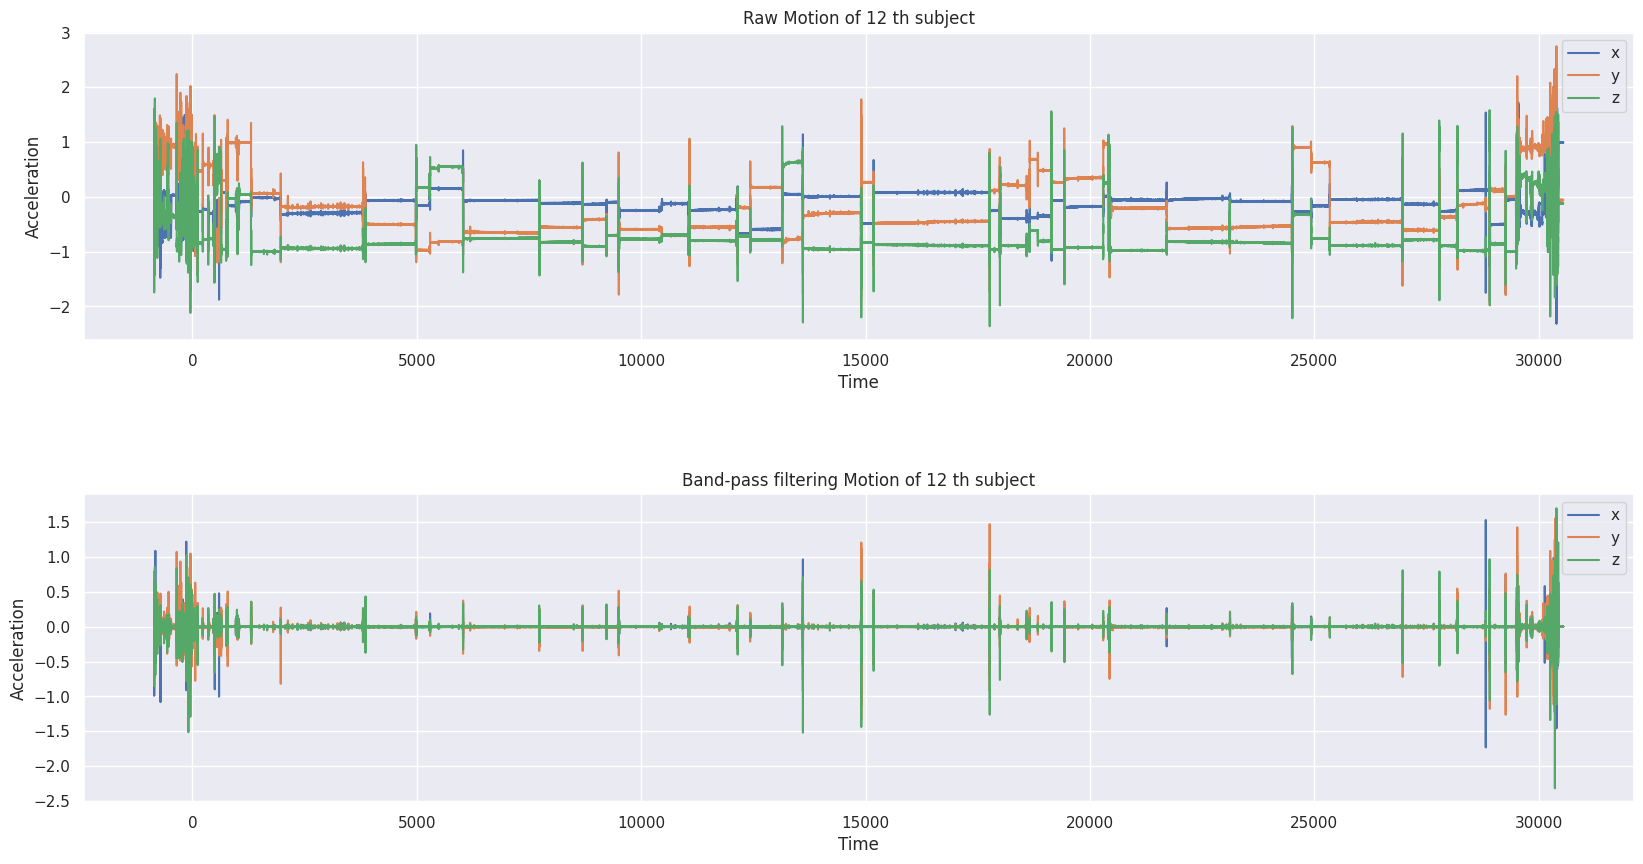

In [7]:

# band-pass filtering 전후 그래프 확인

f, ax = plt.subplots(2, 1, figsize=(20,10))

motion[12].plot(x='time', y=['x', 'y', 'z'], ax=ax[0])

# 그래프 제목 설정
ax[0].set_title('Raw Motion of 12 th subject')

# 축 레이블 설정
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Acceleration')

band_motion[12].plot(x='time', y=['x', 'y', 'z'], ax=ax[1])

# 그래프 제목 설정
ax[1].set_title('Band-pass filtering Motion of 12 th subject')

# 축 레이블 설정
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Acceleration')


# subplot 간의 수직 간격 조절
plt.subplots_adjust(hspace=0.5)

plt.show()

In [8]:
for i in range(len(label)):
    print(label[i]['time'])

0          0
1         30
2         60
3         90
4        120
       ...  
562    16860
563    16890
564    16920
565    16950
566    16980
Name: time, Length: 567, dtype: int64
0          0
1         30
2         60
3         90
4        120
       ...  
470    14100
471    14130
472    14160
473    14190
474    14220
Name: time, Length: 475, dtype: int64
0          0
1         30
2         60
3         90
4        120
       ...  
976    29280
977    29310
978    29340
979    29370
980    29400
Name: time, Length: 981, dtype: int64
0          0
1         30
2         60
3         90
4        120
       ...  
944    28320
945    28350
946    28380
947    28410
948    28440
Name: time, Length: 949, dtype: int64
0          0
1         30
2         60
3         90
4        120
       ...  
947    28410
948    28440
949    28470
950    28500
951    28530
Name: time, Length: 952, dtype: int64
0          0
1         30
2         60
3         90
4        120
       ...  
963    28890
964 

In [9]:

# motion time을 int형으로 바꿈
for i in range(len(band_motion)):
    band_motion[i]['time'] = band_motion[i]['time'].astype(int)
print(motion[0]['time'])

# hear_rate time int형으로 바꿈
for i in range(len(heart_rate)):
    heart_rate[i]['time'] = heart_rate[i]['time'].astype(int)
    
for i in range(len(step)):
    step[i]['time'] = step[i]['time'].astype(int)

0        -124489.161050
1        -124489.116395
2        -124489.115548
3        -124489.114691
4        -124489.097700
              ...      
981995     17642.967007
981996     17642.987576
981997     17643.006946
981998     17643.026865
981999     17643.046417
Name: time, Length: 982000, dtype: float64


In [10]:

# 잘 변환되었는지 확인
band_motion[0].head()

,time,x,y,z
0,-124489,-0.000193,0.000295,0.000231
1,-124489,0.000224,-0.003133,-0.002445
2,-124489,0.001090,0.005249,-0.007707
3,-124489,-0.001526,0.004942,-0.005789
4,-124489,-0.005133,-0.001598,0.001742


In [11]:

# 잘 변환되었는지 확인
heart_rate[0].head()

,time,bpm
0,-556410,57
1,-556408,56
2,-556403,56
3,-556399,57
4,-556389,59


In [12]:
step[0].head()

,time,step
0,-604539,0
1,-603939,0
2,-603339,0
3,-602739,0
4,-602139,0


In [13]:
print(f"Length of band_motion: {len(band_motion)}")
print(f"Length of heart_rate: {len(heart_rate)}")
print(f"Length of label: {len(label)}")
print(f"Length of step: {len(step)}")

Length of band_motion: 31
Length of heart_rate: 31
Length of label: 31
Length of step: 31


# 사용가능한 시간값만 

In [14]:
for i in range(len(band_motion)):
    band_motion[i] = band_motion[i][(band_motion[i]['time'] >= 0) & (band_motion[i]['time'] <= label[i]['time'].max())]
    heart_rate[i] = heart_rate[i][(heart_rate[i]['time'] >= 0) & (heart_rate[i]['time'] <= label[i]['time'].max())]
    step[i] = step[i][(step[i]['time'] >= 0) & (step[i]['time'] <= label[i]['time'].max())]

In [15]:
print('sub / len step time/len heart_rate time / len motion time / max motion time / max label time')

for i in range(len(band_motion)):
    print(i,len(step[i]['time'].unique()), len(heart_rate[i]['time'].unique()), len(band_motion[i]['time'].unique()), band_motion[i]['time'].max(), label[i]['time'].max())

sub / len step time/len heart_rate time / len motion time / max motion time / max label time
0 28 3302 16981 16980 16980
1 0 2843 13586 14220 14220
2 0 5652 29302 29400 29400
3 48 5467 28362 28440 28440
4 0 4964 23773 28394 28530
5 43 5574 27692 29010 29010
6 43 5549 26358 28920 28920
7 49 5717 29671 29670 29670
8 50 5702 29611 29610 29610
9 49 5334 25318 29460 29460
10 49 5537 29041 29040 29040
11 1 2496 12481 12480 12480
12 49 5673 29281 29280 29280
13 26 3054 14795 14940 15270
14 49 5575 29071 29070 29070
15 0 5637 29371 29370 29370
16 0 2784 13907 13920 13920
17 49 5609 29302 29310 29310
18 21 4382 22662 22740 22740
19 10 5584 28831 28830 28830
20 43 5691 29431 29430 29430
21 48 837 3901 4024 28770
22 48 5581 28506 28920 28920
23 49 5652 29521 29520 29520
24 0 5625 29131 29130 29130
25 21 5526 26864 28950 28950
26 49 5618 29101 29100 29100
27 31 5537 28921 28920 28920
28 48 5619 29202 29220 29220
29 0 5421 28321 28320 28320
30 0 4007 21571 21570 21570


In [16]:
# 수면 시간이 7.5시간이 안 되는 피험자는 제외 (label[i]['time'].max() < 20000이면 제외 )

less_sleep_idx = set()

for i in range(len(band_motion)):
    if label[i]['time'].max() < 25000:
        less_sleep_idx.add(i)

less_sleep_idx

{0, 1, 11, 13, 16, 18, 30}

In [17]:
# 중간에 -1이 있는 피험자 제외

label_err = {6, 17, 19, 22, 24, 25} 


err_sub_idx = less_sleep_idx | label_err

len(err_sub_idx), err_sub_idx

(13, {0, 1, 6, 11, 13, 16, 17, 18, 19, 22, 24, 25, 30})

In [18]:

select_sub_idx = list(set(range(31)) - err_sub_idx)

select_sub_idx

[2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15, 20, 21, 23, 26, 27, 28, 29]

In [19]:

# 선택된 피험자만 넘파이 배열로 변환

heart_rate = np.array(heart_rate, dtype=object)[select_sub_idx]
label = np.array(label, dtype=object)[select_sub_idx]
band_motion = np.array(band_motion, dtype=object)[select_sub_idx]
step = np.array(step, dtype=object)[select_sub_idx]


In [22]:
for i in range(len(label)):
    print(label[i]['label'].unique())

[0 5 1 2 3]
[-1  0  1  2  3  5]
[0 1 2 3 5]
[-1  0  1  2  3  5]
[-1  0  1  2  3  5]
[-1  0  1  2  3  5]
[-1  0  1  2  3  5]
[-1  0  1  2  3  5]
[-1  0  1  2  3  5]
[0 1 2 3 5]
[-1  0  2  1  3  5]
[-1  0  1  2  3  5]
[-1  0  1  2  3  5]
[-1  0  1  2  3  5]
[-1  0  1  2  3  5]
[-1  0  1  2  3  5]


In [21]:

# 깊은 수면이 없고 라벨이 4가 있는 피험자 제외

heart_rate = np.delete(heart_rate, [4, -1], axis=0)
label = np.delete(label, [4, -1], axis=0)
band_motion = np.delete(band_motion, [4, -1], axis=0)
step = np.delete(step, [4, -1], axis=0)

In [23]:

# 최종적으로 16명의 피험자의 수면을 분류할 예정
len(heart_rate), len(label), len(band_motion)

(16, 16, 16)

In [24]:

interpol_heart_rate = []

for i in range(len(heart_rate)):
    df = heart_rate[i]

    # 보간할 시간 범위 생성
    interpol_time_range = np.arange(df['time'].min(), df['time'].max() + 1)

    # 누락된 시간에 대한 bpm 값 NaN으로 설정한 새로운 데이터프레임 생성
    interpol_df = pd.DataFrame({'time': interpol_time_range})
    interpol_df['bpm'] = np.nan

    # 원본 데이터와 보간된 데이터프레임을 합치기
    new_df = pd.concat([df, interpol_df], ignore_index=True)

    #중복된 time 제거 (interpol_df의 NAN을 제거)
    new_df = new_df.drop_duplicates(subset='time', keep='first')

    # 시간을 기준으로 정렬
    new_df = new_df.sort_values('time')

    # NaN 값 채우기
    new_df['bpm'].interpolate(inplace=True)

    # 인덱스 초기화
    new_df = new_df.reset_index(drop=True)
    
    interpol_heart_rate.append(new_df)

In [25]:

# 보간이 잘되었는지 확인
interpol_heart_rate[0].head(20)


,time,bpm
0,1,65.000000
1,2,65.000000
2,3,65.000000
3,4,65.000000
4,5,65.000000
5,6,65.000000
6,7,65.222222
7,8,65.444444
8,9,65.666667
9,10,65.888889


# heart_rate에 가우시안 필터 적용 

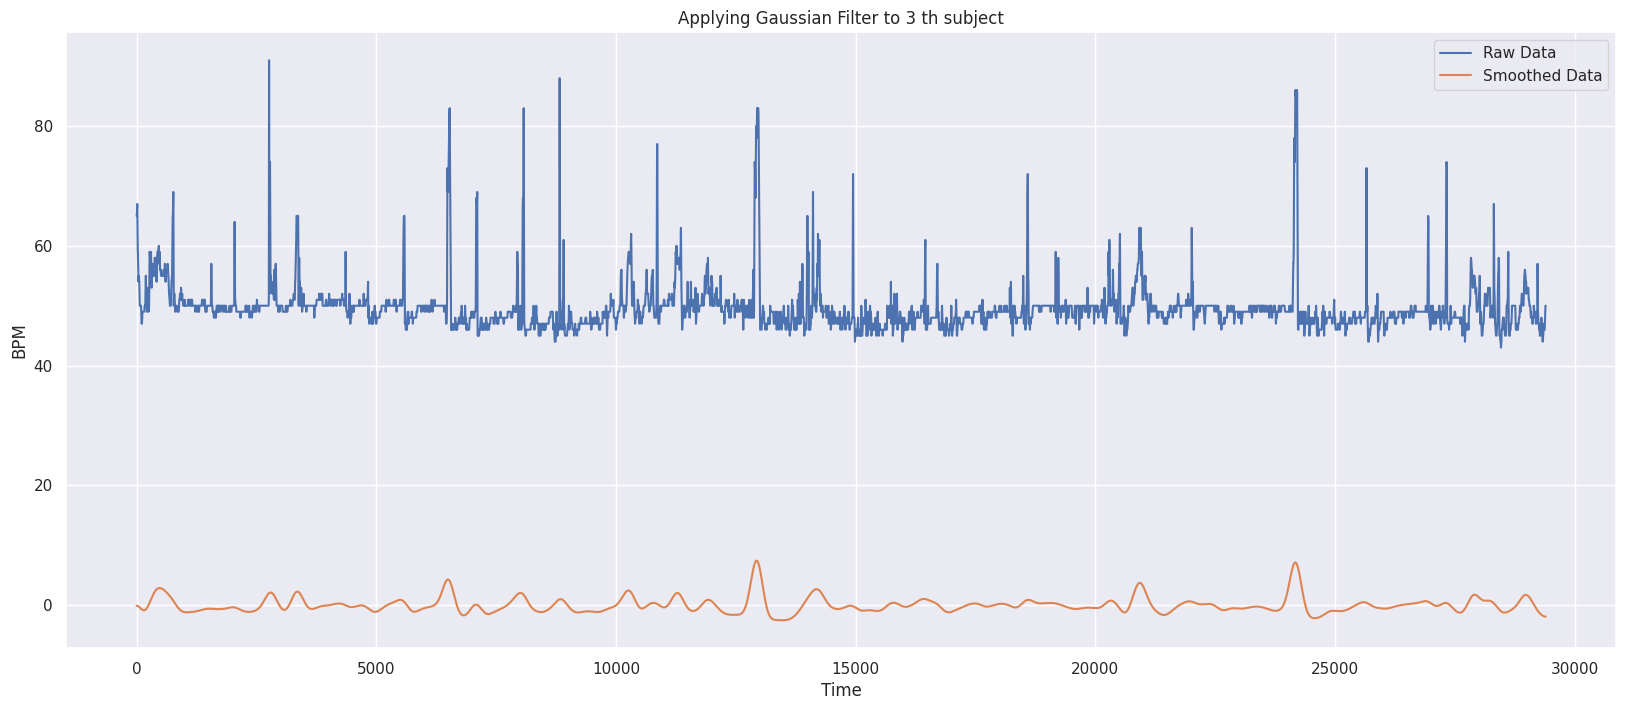

In [26]:
from scipy.ndimage import gaussian_filter


## 예시
data = interpol_heart_rate[0]['bpm']

# 차이 가우시안 필터 적용
sigma1 = 120  # 첫 번째 가우시안 필터의 표준편차
sigma2 = 600  # 두 번째 가우시안 필터의 표준편차

gaussian_smoothed = gaussian_filter(data, sigma1) - gaussian_filter(data, sigma2)

# 결과 시각화
plt.figure(figsize=(20, 8))
plt.plot(data, label='Raw Data')
plt.plot(gaussian_smoothed, label='Smoothed Data')
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Applying Gaussian Filter to 3 th subject')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
filter_heart_rate = []

# 차이 가우시안 필터 적용
sigma1 = 120  # 첫 번째 가우시안 필터의 표준편차
sigma2 = 600  # 두 번째 가우시안 필터의 표준편차

for i in range(len(heart_rate)):
    data = interpol_heart_rate[i]['bpm']
    gaussian_smoothed = gaussian_filter(data, sigma1) - gaussian_filter(data, sigma2)
    
    df = pd.DataFrame({'time': interpol_heart_rate[i]['time'], 'bpm': gaussian_smoothed})
    filter_heart_rate.append(df)

In [28]:
# 정규화 함수 정의
def normalize_data(df):
    avg = df['bpm'].mean()
    diff = np.abs(df['bpm'] - avg)
    percentile_90 = np.percentile(diff, 90)
    normalized_value = df['bpm'] / percentile_90
    return normalized_value

for i in range(len(filter_heart_rate)):
    filter_heart_rate[i]['bpm'] = normalize_data(filter_heart_rate[i])    

# 잘 되었는지 확인
filter_heart_rate[0]

,time,bpm
0,1,-0.060843
1,2,-0.060921
2,3,-0.061078
3,4,-0.061312
4,5,-0.061626
...,...,...
29393,29394,-1.007394
29394,29395,-1.007552
29395,29396,-1.007670
29396,29397,-1.007749


In [29]:

for i in range(len(label)):
    label[i]['label'].replace(-1, 0, inplace=True)


In [32]:
def katz_fd(x, axis=-1):
    """Katz Fractal Dimension.

    Parameters
    ----------
    x : list or np.array
        1D or N-D data.
    axis : int
        The axis along which the FD is calculated. Default is -1 (last).

    Returns
    -------
    kfd : float
        Katz fractal dimension.

    Notes
    -----
    Katz’s method calculates the fractal dimension of a sample as follows:
    the sum and average of the Euclidean distances between the successive
    points of the sample (:math:`L` and :math:`a` , resp.) are calculated as
    well as the maximum distance between the first point and any other point
    of the sample (:math:`d`). The fractal dimension of the sample (:math:`D`)
    then becomes:

    .. math::
        D = \\frac{\\log_{10}(L/a)}{\\log_{10}(d/a)} =
        \\frac{\\log_{10}(n)}{\\log_{10}(d/L)+\\log_{10}(n)}

    where :math:`n` is :math:`L` divided by :math:`a`.

    Original code from the `mne-features <https://mne.tools/mne-features/>`_
    package by Jean-Baptiste Schiratti and Alexandre Gramfort.

    References
    ----------
    * https://ieeexplore.ieee.org/abstract/document/904882

    * https://hal.inria.fr/inria-00442374/

    * https://www.hindawi.com/journals/ddns/2011/724697/

    Examples
    --------
    >>> import numpy as np
    >>> import entropy as ent
    >>> import stochastic.processes.noise as sn
    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.5, rng=rng).sample(10000)
    >>> print(f"{ent.katz_fd(x):.4f}")
    6.4713

    Fractional Gaussian noise with H = 0.9

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.9, rng=rng).sample(10000)
    >>> print(f"{ent.katz_fd(x):.4f}")
    4.5720

    Fractional Gaussian noise with H = 0.1

    >>> rng = np.random.default_rng(seed=42)
    >>> x = sn.FractionalGaussianNoise(hurst=0.1, rng=rng).sample(10000)
    >>> print(f"{ent.katz_fd(x):.4f}")
    7.6540

    Random

    >>> rng = np.random.default_rng(seed=42)
    >>> print(f"{ent.katz_fd(rng.random(1000)):.4f}")
    8.1531

    Pure sine wave

    >>> x = np.sin(2 * np.pi * 1 * np.arange(3000) / 100)
    >>> print(f"{ent.katz_fd(x):.4f}")
    2.4871

    Linearly-increasing time-series (should be 1)

    >>> x = np.arange(1000)
    >>> print(f"{ent.katz_fd(x):.4f}")
    1.0000
    """

    x = np.array(x)
  
    dists = np.abs(np.diff(x, axis=axis))
    ll = dists.sum(axis=axis) 
    ln = np.log10(ll / dists.mean(axis=axis))
    aux_d = x - np.take(x, indices=[0], axis=axis)
    d = np.max(np.abs(aux_d), axis=axis)
    kfd = np.squeeze(ln / (ln + np.log10(d / ll)))
    
    if not kfd.ndim:
        kfd = kfd.item()
    
    return kfd


In [30]:
def rms(data):
    squared_data = np.square(data)  # 각 데이터의 제곱값 계산
    mean_squared = np.mean(squared_data)  # 제곱값의 평균 계산
    root_mean_square = np.sqrt(mean_squared)  # 평균의 제곱근 계산
    return root_mean_square

In [31]:

def get_features_mt(df, max_time, func_list):

    # 시간 범위 인덱스
    time_idx = 1

    # 계산된 피쳐 리스트
    feat = []

    while 30 * (time_idx - 1) <= max_time:

        ## time slicing ##
        # label은 30초 단위로 기록되어 있으므로 0 ~ 29, 30 ~ 59, .. 의 기록의 통계량을 feature로 만듦
        # 이때, x, y, z 각각 따로 줘야됨
        tmp_df = df[( df['time'] >= 30 * (time_idx - 1) ) & (df['time'] <= 30 * time_idx - 1)]
        time_idx += 1

        ## 피쳐 적용 ##
        tmp_feat = []
        for func in func_list:
            for i in ['x', 'y', 'z']:
                if tmp_df[i].size == 0: # 해당 구간의 데이터가 없다면
                    tmp_feat.append(np.NAN) # NaN으로 채우기
                else:
                    res = func(tmp_df[i])
                    tmp_feat.append(res)

        feat.append(tmp_feat)

    return feat

In [33]:

# 최종적으로 피험자별 수면 데이터를 담을 리스트
sleep_df = [] 

# feature 이름으로 data frame columns 설정
func_name = ['mean', 'std', 'var', 'max', 'rms', 'katz_fd']
mt_col = [] # motion columns 리스트

# mt 접두사와 해당하는 축으로(x, y, z) 접미사 붙이기
for func in func_name:
    for ax in ['x', 'y', 'z']:
        col_name = 'mt_' + func + f'_{ax}'
        mt_col.append(col_name)
    
# columns 이름 출력
print(mt_col)
        
# 각 피험자별로 iteration
for i in tqdm(range(len(band_motion))):
    mt_df, target = band_motion[i], label[i]
    
    # feature selection 작업
    mt_arr = np.array( get_features_mt(mt_df, target['time'].max(), [np.mean, np.std, np.var, np.max, rms, katz_fd]) )

    # 결측치가 있는 행은 이전 행의 데이터로 대체
    for j in range(len(mt_arr)):
        if np.isnan(mt_arr[j]).any():
            mt_arr[j] = mt_arr[j-1].copy()
    
    # feature selection이 잘 되었는지 확인 (motion의 row와 target의 row 개수가 같아야 됨)
    print(mt_arr.shape, target.shape)
    
    # array를 data frame으로 변환 후 sleep_df에 추가
    mt_df = pd.DataFrame(mt_arr, columns=mt_col)
    df = pd.concat([target['label'], mt_df], axis=1)
    
    sleep_df.append(df)

['mt_mean_x', 'mt_mean_y', 'mt_mean_z', 'mt_std_x', 'mt_std_y', 'mt_std_z', 'mt_var_x', 'mt_var_y', 'mt_var_z', 'mt_max_x', 'mt_max_y', 'mt_max_z', 'mt_rms_x', 'mt_rms_y', 'mt_rms_z', 'mt_katz_fd_x', 'mt_katz_fd_y', 'mt_katz_fd_z']


  0%|          | 0/16 [00:00<?, ?it/s]

(981, 18) (981, 2)
(949, 18) (949, 2)
(952, 18) (952, 2)
(968, 18) (968, 2)
(988, 18) (988, 2)
(983, 18) (983, 2)
(969, 18) (969, 2)
(977, 18) (977, 2)
(970, 18) (970, 2)
(980, 18) (980, 2)
(982, 18) (982, 2)
(960, 18) (960, 2)
(985, 18) (985, 2)
(971, 18) (971, 2)
(965, 18) (965, 2)
(975, 18) (975, 2)


In [34]:
def get_features_hr(df, max_time, func_list):

    # 시간 범위 인덱스
    time_idx = 1

    # 계산된 피쳐 리스트
    feat = []

    while 30 * (time_idx - 1) <= max_time:

        ## time slicing ##
        # label은 30초 단위로 기록되어 있으므로 0 ~ 29, 30 ~ 59, .. 의 기록의 통계량을 feature로 만듦
        # 이때, x, y, z 각각 따로 줘야됨
        tmp_df = df[( df['time'] >= 30 * (time_idx - 1) ) & (df['time'] <= 30 * time_idx - 1)]
        time_idx += 1

        ## 피쳐 적용 ##
        tmp_feat = []
        for func in func_list:
                if tmp_df['bpm'].size == 0:
                    tmp_feat.append(np.NAN)
                else:
                    res = func(tmp_df['bpm'])
                    tmp_feat.append(res)
        feat.append(tmp_feat)

    return feat

In [35]:
sleep_df

[     label     mt_mean_x     mt_mean_y     mt_mean_z  mt_std_x  mt_std_y  \
 0        0 -9.664594e-05  5.143747e-05 -1.881081e-05  0.061378  0.121067   
 1        0  1.751140e-06 -8.503936e-07  2.252779e-06  0.001908  0.002895   
 2        0 -3.217210e-06  2.333512e-06 -2.146364e-06  0.002062  0.002848   
 3        0 -2.545992e-07 -4.085213e-07 -8.250957e-07  0.002003  0.002620   
 4        0  4.148371e-07 -1.197442e-06  2.207148e-07  0.001997  0.003582   
 ..     ...           ...           ...           ...       ...       ...   
 976      5 -8.335591e-07 -5.399787e-06  3.008214e-06  0.014886  0.057865   
 977      5  5.749543e-07  1.654670e-06  7.380747e-07  0.002040  0.003956   
 978      5  2.640346e-07 -5.227136e-06 -4.118247e-06  0.002252  0.004129   
 979      5  4.755558e-06  4.675734e-06  3.848696e-06  0.003106  0.006989   
 980      5 -1.300337e-04  2.898352e-05 -5.494924e-05  0.006390  0.020308   
 
      mt_std_z  mt_var_x  mt_var_y  mt_var_z  mt_max_x  mt_max_y  mt_max_z

In [36]:

hr_col = [] # heart rate columns 리스트

# hr 접두사 붙이기
for func in func_name:
    col_name = 'hr_' + func
    hr_col.append(col_name)
    
# columns 이름 출력
print(hr_col)
        
# 각 피험자별로 iteration
for i in tqdm(range(len(filter_heart_rate))):
    hr_df, target = filter_heart_rate[i], label[i]
    
    # feature selection 작업
    hr_arr = np.array( get_features_hr(hr_df, target['time'].max(), [np.mean, np.std, np.var, np.max, rms, katz_fd]) )

    # 결측치가 있는 행은 이전 행 데이터로 대체
    for j in range(len(hr_arr)):
        if np.isnan(hr_arr[j]).any():
            hr_arr[j] = hr_arr[j-1].copy()
            
    # feature selection이 잘 되었는지 확인 (heart rate row와 target의 row 개수가 같아야 됨)
    print(hr_arr.shape, target.shape)
    
    # array를 data frame으로 변환 후 sleep_df에 추가
    hr_df = pd.DataFrame(hr_arr, columns=hr_col)
    sleep_df[i] = pd.concat([sleep_df[i], hr_df], axis=1)

['hr_mean', 'hr_std', 'hr_var', 'hr_max', 'hr_rms', 'hr_katz_fd']


  0%|          | 0/16 [00:00<?, ?it/s]

(981, 6) (981, 2)
(949, 6) (949, 2)
(952, 6) (952, 2)
(968, 6) (968, 2)
(988, 6) (988, 2)
(983, 6) (983, 2)
(969, 6) (969, 2)
(977, 6) (977, 2)
(970, 6) (970, 2)
(980, 6) (980, 2)
(982, 6) (982, 2)
(960, 6) (960, 2)
(985, 6) (985, 2)
(971, 6) (971, 2)
(965, 6) (965, 2)
(975, 6) (975, 2)


In [37]:
step

array([Empty DataFrame
       Columns: [time, step]
       Index: []            ,        time  step
                              1008     30     0
                              1009    630     0
                              1010   1230     0
                              1011   1830     0
                              1012   2430     0
                              1013   3030     0
                              1014   3630     6
                              1015   4230     0
                              1016   4830     0
                              1017   5430     0
                              1018   6030     0
                              1019   6630     1
                              1020   7230     0
                              1021   7830     0
                              1022   8430     0
                              1023   9030     0
                              1024   9630    11
                              1025  10230     0
                              1026  

In [38]:
def get_features_st(df, max_time, func_list):

    # 시간 범위 인덱스
    time_idx = 1

    # 계산된 피쳐 리스트
    feat = []

    while 30 * (time_idx - 1) <= max_time:

        ## time slicing ##
        # label은 30초 단위로 기록되어 있으므로 0 ~ 29, 30 ~ 59, .. 의 기록의 통계량을 feature로 만듦
        # 이때, x, y, z 각각 따로 줘야됨
        tmp_df = df[( df['time'] >= 30 * (time_idx - 1) ) & (df['time'] <= 30 * time_idx - 1)]
        time_idx += 1

        ## 피쳐 적용 ##
        tmp_feat = []
        for func in func_list:
                if tmp_df['step'].size == 0:
                    tmp_feat.append(0)
                else:
                    res = func(tmp_df['step'])
                    tmp_feat.append(res)
        feat.append(tmp_feat)

    return feat

In [151]:
st_col = [] #step columns 리스트

# hr 접두사 붙이기
for func in func_name:
    col_name = 'st_' + func
    st_col.append(col_name)
    
# columns 이름 출력
print(st_col)
        
# 각 피험자별로 iteration
for i in tqdm(range(len(step))):
    st_df, target = step[i], label[i]
    
    # feature selection 작업
    st_arr = np.array( get_features_st(st_df, target['time'].max(), [np.mean, np.std, np.var, np.max, rms, katz_fd]) )

    # 결측치가 있는 행은 이전 행 데이터로 대체
    for j in range(len(st_arr)):
        if np.isnan(st_arr[j]).any():
            st_arr[j] = st_arr[j-1].copy()
            
    # feature selection이 잘 되었는지 확인 (heart rate row와 target의 row 개수가 같아야 됨)
    print(st_arr.shape, target.shape)
    
    # array를 data frame으로 변환 후 sleep_df에 추가
    st_df = pd.DataFrame(st_arr, columns=st_col)
    sleep_df[i] = pd.concat([sleep_df[i], st_df], axis=1)

['st_mean', 'st_std', 'st_var', 'st_max', 'st_rms', 'st_katz_fd']


  0%|          | 0/18 [00:00<?, ?it/s]

(981, 6) (981, 2)
(949, 6) (949, 2)
(952, 6) (952, 2)
(968, 6) (968, 2)
(988, 6) (988, 2)
(983, 6) (983, 2)
(969, 6) (969, 2)
(977, 6) (977, 2)
(970, 6) (970, 2)
(980, 6) (980, 2)
(759, 6) (759, 2)
(982, 6) (982, 2)
(960, 6) (960, 2)
(985, 6) (985, 2)
(971, 6) (971, 2)
(965, 6) (965, 2)
(975, 6) (975, 2)
(945, 6) (945, 2)


In [39]:
import pandas as pd

# sleep_df에 있는 데이터프레임들을 하나의 데이터프레임으로 합치기
combined_sleep_df = pd.concat(sleep_df, axis=0, ignore_index=True)

# 결과 확인
print(combined_sleep_df)


       label     mt_mean_x     mt_mean_y     mt_mean_z  mt_std_x  mt_std_y  \
0          0 -9.664594e-05  5.143747e-05 -1.881081e-05  0.061378  0.121067   
1          0  1.751140e-06 -8.503936e-07  2.252779e-06  0.001908  0.002895   
2          0 -3.217210e-06  2.333512e-06 -2.146364e-06  0.002062  0.002848   
3          0 -2.545992e-07 -4.085213e-07 -8.250957e-07  0.002003  0.002620   
4          0  4.148371e-07 -1.197442e-06  2.207148e-07  0.001997  0.003582   
...      ...           ...           ...           ...       ...       ...   
15550      0  6.370880e-07 -3.150229e-07  3.563492e-06  0.003076  0.016937   
15551      1 -1.014410e-06 -3.221956e-06 -3.346405e-06  0.000849  0.001834   
15552      0  1.770335e-07  3.948767e-06 -2.719775e-07  0.000809  0.001721   
15553      2  2.973716e-07 -5.600813e-06  2.409887e-09  0.000814  0.001706   
15554      2  2.475438e-05  1.216208e-04  2.412756e-05  0.000820  0.001550   

       mt_std_z      mt_var_x  mt_var_y  mt_var_z  ...  mt_rms_

In [40]:
combined_sleep_df.columns

Index(['label', 'mt_mean_x', 'mt_mean_y', 'mt_mean_z', 'mt_std_x', 'mt_std_y',
       'mt_std_z', 'mt_var_x', 'mt_var_y', 'mt_var_z', 'mt_max_x', 'mt_max_y',
       'mt_max_z', 'mt_rms_x', 'mt_rms_y', 'mt_rms_z', 'mt_katz_fd_x',
       'mt_katz_fd_y', 'mt_katz_fd_z', 'hr_mean', 'hr_std', 'hr_var', 'hr_max',
       'hr_rms', 'hr_katz_fd'],
      dtype='object')

In [41]:

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, confusion_matrix

In [42]:
data = combined_sleep_df

In [43]:
X = data.drop('label' , axis=1)
y = data['label']

In [44]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [45]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [46]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 150)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 150)
print(X_test.shape, y_test.shape)

(13850, 150, 24) (13850,)
(1407, 150, 24) (1407,)


In [47]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [48]:
X_train = X_train.astype('float32')
y_train_onehot = y_train_onehot.astype('float32')
X_test = X_test.astype('float32')
y_test_onehot = y_test_onehot.astype('float32')

In [49]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]


In [134]:
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv1D, Flatten, Dense

input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=128, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(5, activation = "softmax")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 24)]         0         
                                                                 
 conv1d_6 (Conv1D)           (None, 148, 128)          9344      
                                                                 
 flatten_4 (Flatten)         (None, 18944)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                1212480   
                                                                 
 dense_13 (Dense)            (None, 5)                 325       
                                                                 
Total params: 1222149 (4.66 MB)
Trainable params: 1222149 (4.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
train_epochs = 10
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/10
347/347 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.4760 - val_loss: 1.3392 - val_accuracy: 0.4874
Epoch 2/10
347/347 [==============================] - 1s 3ms/step - loss: 1.2885 - accuracy: 0.5038 - val_loss: 1.3372 - val_accuracy: 0.5036
Epoch 3/10
347/347 [==============================] - 1s 3ms/step - loss: 1.2289 - accuracy: 0.5239 - val_loss: 1.3112 - val_accuracy: 0.5166
Epoch 4/10
347/347 [==============================] - 1s 3ms/step - loss: 1.1704 - accuracy: 0.5430 - val_loss: 1.3406 - val_accuracy: 0.4971
Epoch 5/10
347/347 [==============================] - 1s 3ms/step - loss: 1.0990 - accuracy: 0.5656 - val_loss: 1.3730 - val_accuracy: 0.5072
Epoch 6/10
347/347 [==============================] - 1s 3ms/step - loss: 1.0085 - accuracy: 0.5968 - val_loss: 1.4296 - val_accuracy: 0.4686
Epoch 7/10
347/347 [==============================] - 1s 3ms/step - loss: 0.9110 - accuracy: 0.6387 - val_loss: 1.5407 - val_accuracy: 0.4798
Epoch 

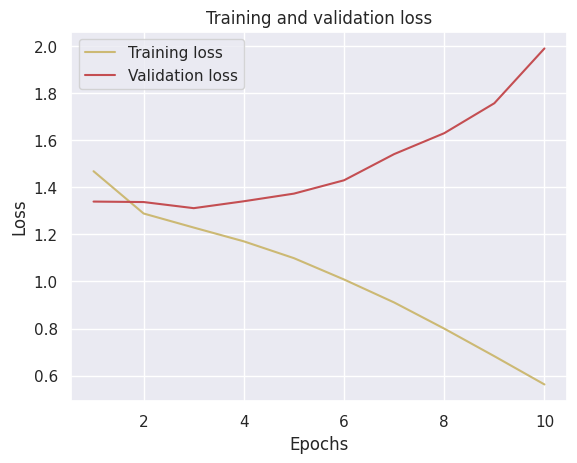

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

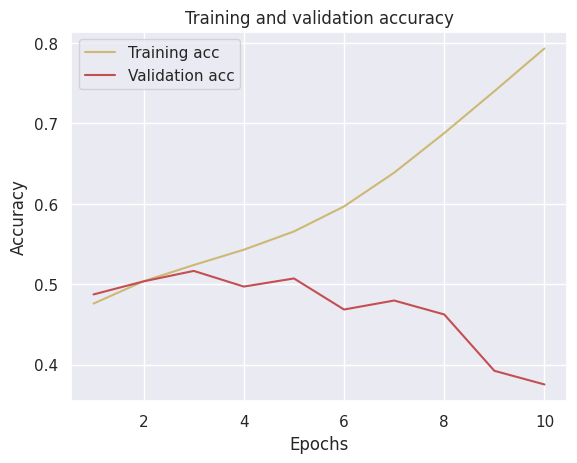

In [137]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [138]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

44/44 [==============================] - 0s 1ms/step


In [139]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.26      0.22      0.23       152
           1       0.09      0.03      0.05       100
           2       0.58      0.52      0.54       677
           3       0.20      0.13      0.16       194
           4       0.28      0.50      0.35       284

    accuracy                           0.39      1407
   macro avg       0.28      0.28      0.27      1407
weighted avg       0.39      0.39      0.38      1407

[[ 33   3  42  14  60]
 [ 13   3  36   9  39]
 [ 48  15 349  51 214]
 [ 12   4  92  25  61]
 [ 23   7  86  26 142]]


In [142]:
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv1D, Flatten, Dense
from keras.layers import Input, Conv1D, Flatten, Dense, LSTM

input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm = LSTM(64)(conv1)

dens = Dense(32, activation='relu')(lstm)
outputs = Dense(n_outputs, activation='softmax')(dens)

model = Model(inputs=input_layer, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 24)]         0         
                                                                 
 conv1d_8 (Conv1D)           (None, 148, 64)           4672      
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 5)                 165       
                                                                 
Total params: 39941 (156.02 KB)
Trainable params: 39941 (156.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
train_epochs = 10
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/10
347/347 [==============================] - 6s 10ms/step - loss: 1.2994 - accuracy: 0.5097 - val_loss: 1.2534 - val_accuracy: 0.5271
Epoch 2/10
347/347 [==============================] - 3s 9ms/step - loss: 1.2499 - accuracy: 0.5306 - val_loss: 1.2309 - val_accuracy: 0.5368
Epoch 3/10
347/347 [==============================] - 3s 9ms/step - loss: 1.2346 - accuracy: 0.5355 - val_loss: 1.2284 - val_accuracy: 0.5419
Epoch 4/10
347/347 [==============================] - 3s 9ms/step - loss: 1.2290 - accuracy: 0.5355 - val_loss: 1.2298 - val_accuracy: 0.5390
Epoch 5/10
347/347 [==============================] - 3s 9ms/step - loss: 1.2230 - accuracy: 0.5378 - val_loss: 1.2138 - val_accuracy: 0.5448
Epoch 6/10
347/347 [==============================] - 3s 9ms/step - loss: 1.2192 - accuracy: 0.5404 - val_loss: 1.2120 - val_accuracy: 0.5480
Epoch 7/10
347/347 [==============================] - 3s 9ms/step - loss: 1.2199 - accuracy: 0.5394 - val_loss: 1.2111 - val_accuracy: 0.5440
Epoch

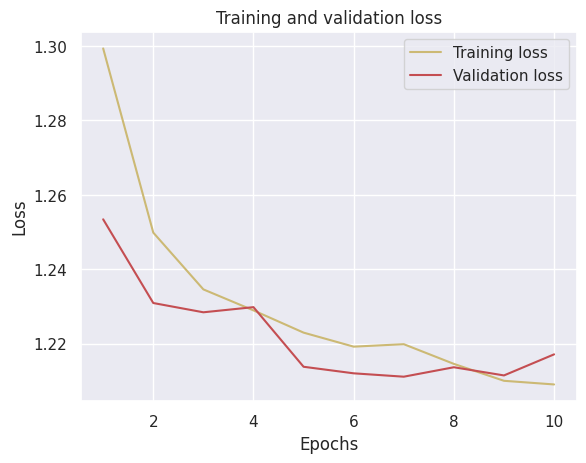

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

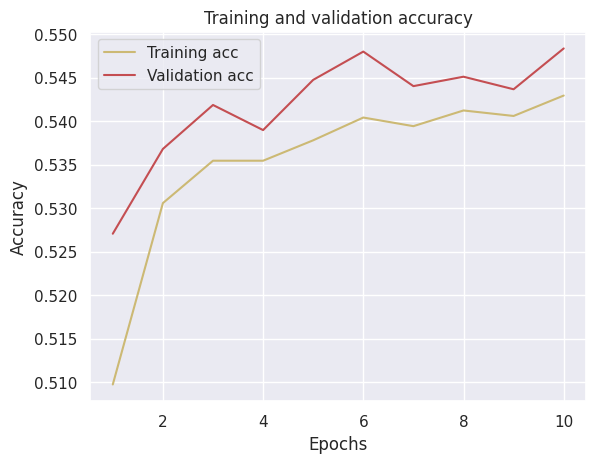

In [145]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm1 = LSTM(30,return_sequences=True)(conv1)
lstm2 = LSTM(30,return_sequences=True)(lstm1)
lstm3 = LSTM(30)(lstm2)

dens = Dense(32, activation='relu')(lstm3)
outputs = Dense(n_outputs, activation='softmax')(dens)

model = Model(inputs=input_layer, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 24)]         0         
                                                                 
 conv1d_2 (Conv1D)           (None, 148, 64)           4672      
                                                                 
 lstm_1 (LSTM)               (None, 148, 30)           11400     
                                                                 
 lstm_2 (LSTM)               (None, 148, 30)           7320      
                                                                 
 lstm_3 (LSTM)               (None, 30)                7320      
                                                                 
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 6)                 198 

In [61]:
train_epochs = 100
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/100
385/385 [==============================] - 15s 29ms/step - loss: 1.4172 - accuracy: 0.4725 - val_loss: 1.4067 - val_accuracy: 0.4670
Epoch 2/100
385/385 [==============================] - 10s 27ms/step - loss: 1.3603 - accuracy: 0.4868 - val_loss: 1.3395 - val_accuracy: 0.4950
Epoch 3/100
385/385 [==============================] - 10s 27ms/step - loss: 1.3221 - accuracy: 0.5072 - val_loss: 1.3239 - val_accuracy: 0.5135
Epoch 4/100
385/385 [==============================] - 10s 27ms/step - loss: 1.3073 - accuracy: 0.5180 - val_loss: 1.3186 - val_accuracy: 0.5174
Epoch 5/100
385/385 [==============================] - 10s 27ms/step - loss: 1.2960 - accuracy: 0.5235 - val_loss: 1.3049 - val_accuracy: 0.5187
Epoch 6/100
385/385 [==============================] - 11s 27ms/step - loss: 1.2779 - accuracy: 0.5283 - val_loss: 1.2832 - val_accuracy: 0.5151
Epoch 7/100
385/385 [==============================] - 11s 27ms/step - loss: 1.2639 - accuracy: 0.5321 - val_loss: 1.2762 - val_ac

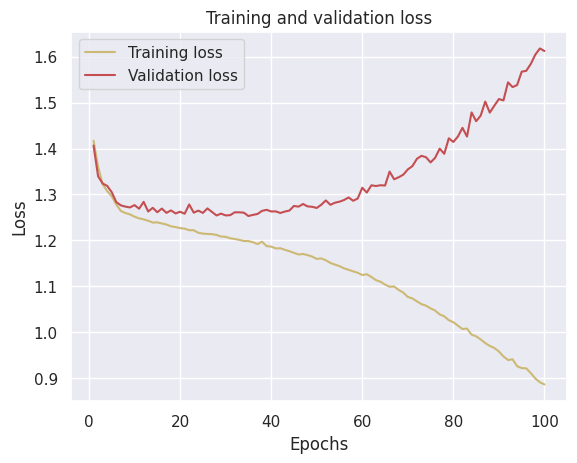

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

50/50 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.44      0.27      0.34       164
           1       0.08      0.02      0.03       128
           2       0.53      0.72      0.61       729
           3       0.26      0.16      0.20       210
           4       0.00      0.00      0.00         5
           5       0.38      0.37      0.37       341

    accuracy                           0.46      1577
   macro avg       0.28      0.26      0.26      1577
weighted avg       0.41      0.46      0.43      1577

[[ 45   8  72   3   0  36]
 [ 13   2  83   9   0  21]
 [ 27   8 522  56   0 116]
 [  4   1 139  33   0  33]
 [  0   0   4   1   0   0]
 [ 14   7 170  24   0 126]]


# 4-classification


In [50]:

for i in range(len(y)):
    y.replace(2, 1, inplace=True)

In [51]:
y.unique()

array([0, 5, 1, 3])

In [52]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [53]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 150)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 150)
print(X_test.shape, y_test.shape)

(13850, 150, 24) (13850,)
(1407, 150, 24) (1407,)


In [54]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [55]:
y_train_onehot = y_train_onehot.astype('float32')
y_test_onehot = y_test_onehot.astype('float32')

In [56]:
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv1D, Flatten, Dense

input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(4, activation = "softmax")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2024-06-24 05:17:18.090761: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 05:17:18.090859: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 05:17:18.090908: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-24 05:17:18.099060: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 24)]         0         
                                                                 
 conv1d (Conv1D)             (None, 148, 64)           4672      
                                                                 
 flatten (Flatten)           (None, 9472)              0         
                                                                 
 dense (Dense)               (None, 64)                606272    
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 611204 (2.33 MB)
Trainable params: 611204 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-06-24 05:17:20.939231: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:4c:00.0, compute capability: 8.0
2024-06-24 05:17:20.941543: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:88:00.0, compute capability: 8.0


In [57]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/30


2024-06-24 05:17:31.750100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-06-24 05:17:32.027358: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f66b11e1da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-24 05:17:32.027407: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-06-24 05:17:32.027423: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-06-24 05:17:32.032911: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-24 05:17:32.116137: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


347/347 [==============================] - 3s 4ms/step - loss: 1.2241 - accuracy: 0.5407 - val_loss: 1.1548 - val_accuracy: 0.5487
Epoch 2/30
347/347 [==============================] - 1s 3ms/step - loss: 1.1101 - accuracy: 0.5571 - val_loss: 1.1288 - val_accuracy: 0.5610
Epoch 3/30
347/347 [==============================] - 1s 3ms/step - loss: 1.0381 - accuracy: 0.5827 - val_loss: 1.1436 - val_accuracy: 0.5303
Epoch 4/30
347/347 [==============================] - 1s 3ms/step - loss: 0.9787 - accuracy: 0.6051 - val_loss: 1.1550 - val_accuracy: 0.5354
Epoch 5/30
347/347 [==============================] - 1s 3ms/step - loss: 0.9181 - accuracy: 0.6294 - val_loss: 1.1987 - val_accuracy: 0.5329
Epoch 6/30
347/347 [==============================] - 1s 3ms/step - loss: 0.8528 - accuracy: 0.6572 - val_loss: 1.2373 - val_accuracy: 0.5390
Epoch 7/30
347/347 [==============================] - 1s 3ms/step - loss: 0.7751 - accuracy: 0.6885 - val_loss: 1.3080 - val_accuracy: 0.4939
Epoch 8/30
347/34

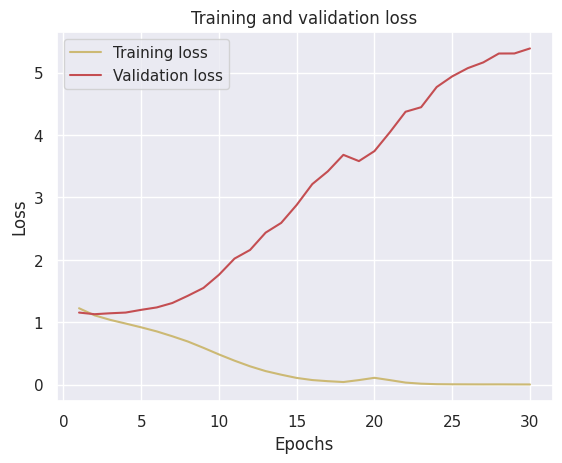

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

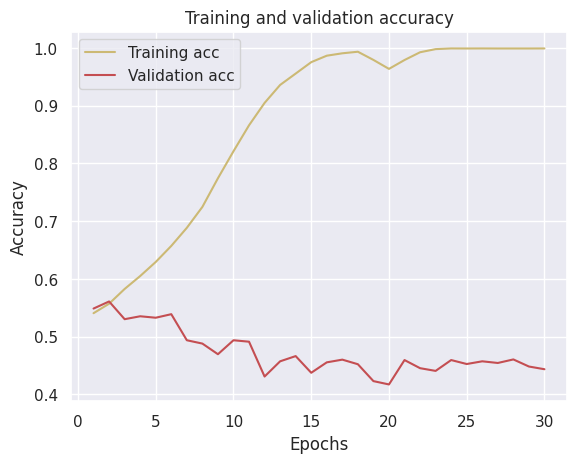

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.25      0.26      0.26       152
           1       0.61      0.66      0.63       777
           2       0.20      0.15      0.17       194
           3       0.26      0.25      0.25       284

    accuracy                           0.46      1407
   macro avg       0.33      0.33      0.33      1407
weighted avg       0.45      0.46      0.45      1407

[[ 40  59  14  39]
 [ 67 510  71 129]
 [ 12 118  29  35]
 [ 41 144  28  71]]


In [63]:
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv1D, Flatten, Dense
from keras.layers import Input, Conv1D, Flatten, Dense, LSTM

input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm = LSTM(64)(conv1)

dens = Dense(32, activation='relu')(lstm)
outputs = Dense(4, activation='softmax')(dens)

model = Model(inputs=input_layer, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 24)]         0         
                                                                 
 conv1d_2 (Conv1D)           (None, 148, 64)           4672      
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 39908 (155.89 KB)
Trainable params: 39908 (155.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/30
347/347 [==============================] - 5s 11ms/step - loss: 1.1171 - accuracy: 0.5597 - val_loss: 1.0864 - val_accuracy: 0.5859
Epoch 2/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0620 - accuracy: 0.5863 - val_loss: 1.0646 - val_accuracy: 0.5870
Epoch 3/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0508 - accuracy: 0.5871 - val_loss: 1.0465 - val_accuracy: 0.5823
Epoch 4/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0438 - accuracy: 0.5878 - val_loss: 1.0348 - val_accuracy: 0.5931
Epoch 5/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0368 - accuracy: 0.5879 - val_loss: 1.0347 - val_accuracy: 0.5949
Epoch 6/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0353 - accuracy: 0.5885 - val_loss: 1.0348 - val_accuracy: 0.5917
Epoch 7/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0301 - accuracy: 0.5920 - val_loss: 1.0530 - val_accuracy: 0.5780
Epoch

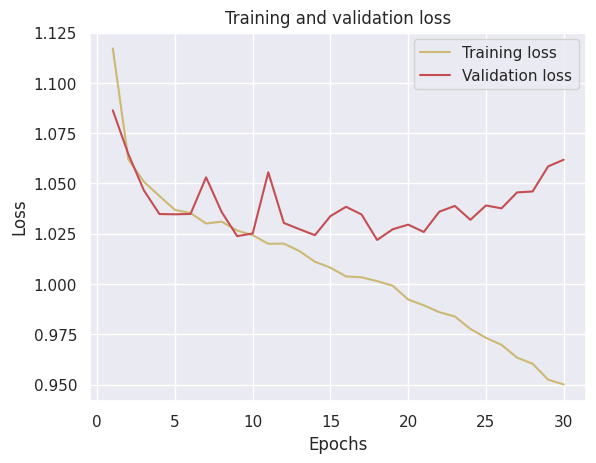

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

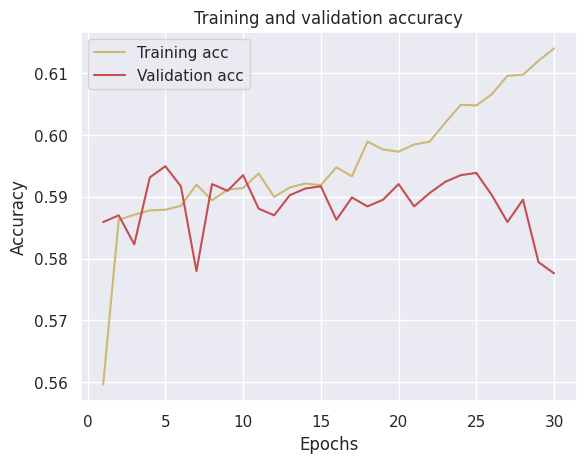

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

44/44 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.53      0.28      0.36       152
           1       0.60      0.89      0.72       777
           2       0.12      0.01      0.02       194
           3       0.46      0.27      0.34       284

    accuracy                           0.58      1407
   macro avg       0.43      0.36      0.36      1407
weighted avg       0.50      0.58      0.51      1407

[[ 42  91   0  19]
 [ 22 690  14  51]
 [  3 167   2  22]
 [ 13 194   0  77]]


In [71]:
input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm1 = LSTM(64)(conv1)

dens = Dense(32, activation='relu')(lstm1)
outputs = Dense(4, activation='softmax')(dens)

model = Model(inputs=input_layer, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 24)]         0         
                                                                 
 conv1d_5 (Conv1D)           (None, 148, 64)           4672      
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 4)                 132       
                                                                 
Total params: 39908 (155.89 KB)
Trainable params: 39908 (155.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/30
347/347 [==============================] - 5s 10ms/step - loss: 1.1074 - accuracy: 0.5639 - val_loss: 1.0656 - val_accuracy: 0.5910
Epoch 2/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0575 - accuracy: 0.5853 - val_loss: 1.0469 - val_accuracy: 0.5888
Epoch 3/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0445 - accuracy: 0.5898 - val_loss: 1.0444 - val_accuracy: 0.5931
Epoch 4/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0384 - accuracy: 0.5876 - val_loss: 1.0458 - val_accuracy: 0.5874
Epoch 5/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0358 - accuracy: 0.5894 - val_loss: 1.0311 - val_accuracy: 0.5931
Epoch 6/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0331 - accuracy: 0.5900 - val_loss: 1.0362 - val_accuracy: 0.5946
Epoch 7/30
347/347 [==============================] - 3s 9ms/step - loss: 1.0287 - accuracy: 0.5896 - val_loss: 1.0337 - val_accuracy: 0.5921
Epoch

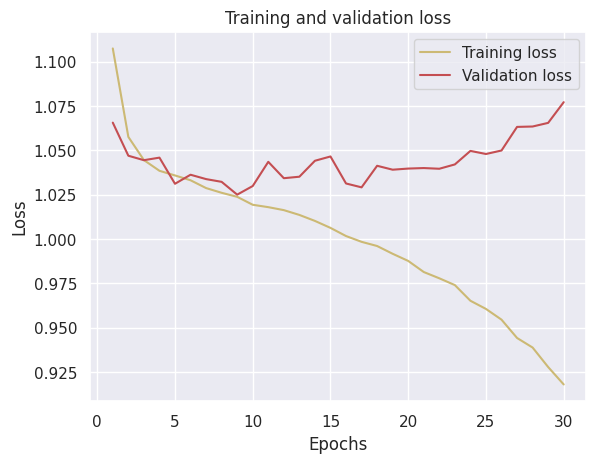

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

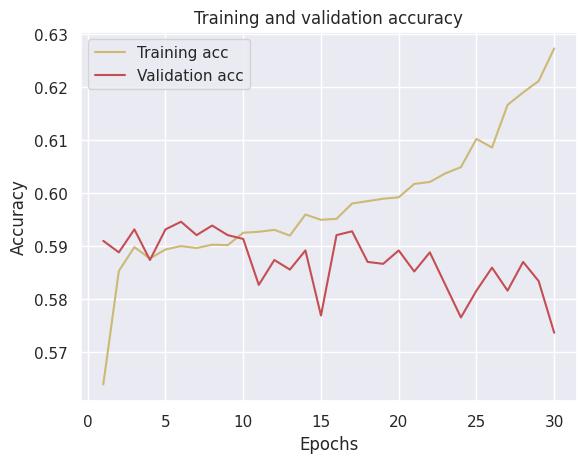

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

44/44 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.46      0.24      0.31       152
           1       0.61      0.89      0.72       777
           2       0.36      0.05      0.09       194
           3       0.45      0.26      0.33       284

    accuracy                           0.58      1407
   macro avg       0.47      0.36      0.36      1407
weighted avg       0.53      0.58      0.51      1407

[[ 36  94   2  20]
 [ 23 690  13  51]
 [  4 160  10  20]
 [ 16 190   3  75]]


# 3-classification

In [76]:

for i in range(len(y)):
    y.replace(3, 1, inplace=True)

In [77]:
y.unique()

array([0, 5, 1])

In [78]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [79]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 150)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 150)
print(X_test.shape, y_test.shape)

(13850, 150, 24) (13850,)
(1407, 150, 24) (1407,)


In [80]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [81]:
y_train_onehot = y_train_onehot.astype('float32')
y_test_onehot = y_test_onehot.astype('float32')

In [84]:
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv1D, Flatten, Dense

input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(3, activation = "softmax")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 24)]         0         
                                                                 
 conv1d_7 (Conv1D)           (None, 148, 64)           4672      
                                                                 
 flatten_2 (Flatten)         (None, 9472)              0         
                                                                 
 dense_13 (Dense)            (None, 64)                606272    
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 611139 (2.33 MB)
Trainable params: 611139 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/30
347/347 [==============================] - 2s 3ms/step - loss: 0.8653 - accuracy: 0.6733 - val_loss: 0.7980 - val_accuracy: 0.6838
Epoch 2/30
347/347 [==============================] - 1s 3ms/step - loss: 0.7615 - accuracy: 0.6908 - val_loss: 0.7893 - val_accuracy: 0.6841
Epoch 3/30
347/347 [==============================] - 1s 3ms/step - loss: 0.7251 - accuracy: 0.7040 - val_loss: 0.7925 - val_accuracy: 0.6812
Epoch 4/30
347/347 [==============================] - 1s 3ms/step - loss: 0.6827 - accuracy: 0.7205 - val_loss: 0.8200 - val_accuracy: 0.6755
Epoch 5/30
347/347 [==============================] - 1s 3ms/step - loss: 0.6401 - accuracy: 0.7342 - val_loss: 0.8547 - val_accuracy: 0.6527
Epoch 6/30
347/347 [==============================] - 1s 3ms/step - loss: 0.5904 - accuracy: 0.7566 - val_loss: 0.8610 - val_accuracy: 0.6585
Epoch 7/30
347/347 [==============================] - 1s 3ms/step - loss: 0.5359 - accuracy: 0.7854 - val_loss: 0.9234 - val_accuracy: 0.6661
Epoch 

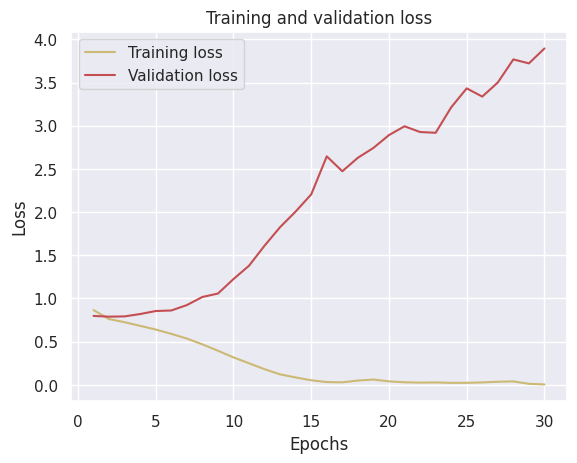

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

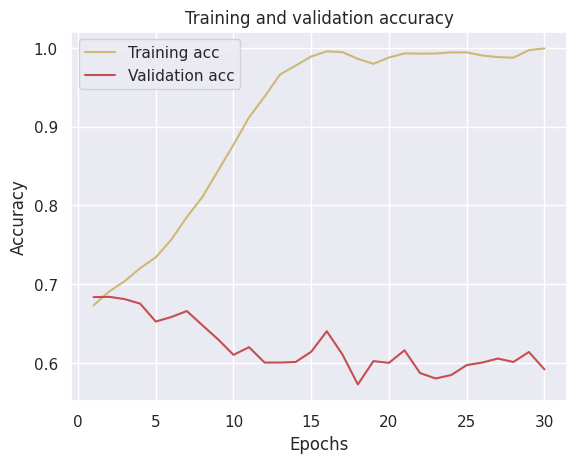

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

44/44 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.30      0.24      0.27       152
           1       0.75      0.78      0.76       971
           2       0.31      0.29      0.30       284

    accuracy                           0.62      1407
   macro avg       0.45      0.44      0.44      1407
weighted avg       0.61      0.62      0.62      1407

[[ 37  84  31]
 [ 57 757 157]
 [ 28 173  83]]


In [90]:
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv1D, Flatten, Dense
from keras.layers import Input, Conv1D, Flatten, Dense, LSTM

input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm = LSTM(64)(conv1)

dens = Dense(32, activation='relu')(lstm)
outputs = Dense(3, activation='softmax')(dens)

model = Model(inputs=input_layer, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 150, 24)]         0         
                                                                 
 conv1d_9 (Conv1D)           (None, 148, 64)           4672      
                                                                 
 lstm_6 (LSTM)               (None, 64)                33024     
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 3)                 99        
                                                                 
Total params: 39875 (155.76 KB)
Trainable params: 39875 (155.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/30
347/347 [==============================] - 5s 11ms/step - loss: 0.7811 - accuracy: 0.6827 - val_loss: 0.7567 - val_accuracy: 0.6866
Epoch 2/30
347/347 [==============================] - 3s 9ms/step - loss: 0.7442 - accuracy: 0.6985 - val_loss: 0.7288 - val_accuracy: 0.7072
Epoch 3/30
347/347 [==============================] - 3s 9ms/step - loss: 0.7351 - accuracy: 0.7046 - val_loss: 0.7248 - val_accuracy: 0.7072
Epoch 4/30
347/347 [==============================] - 3s 9ms/step - loss: 0.7323 - accuracy: 0.7060 - val_loss: 0.7241 - val_accuracy: 0.7061
Epoch 5/30
347/347 [==============================] - 3s 9ms/step - loss: 0.7274 - accuracy: 0.7073 - val_loss: 0.7281 - val_accuracy: 0.7076
Epoch 6/30
347/347 [==============================] - 3s 9ms/step - loss: 0.7268 - accuracy: 0.7072 - val_loss: 0.7241 - val_accuracy: 0.7134
Epoch 7/30
347/347 [==============================] - 3s 9ms/step - loss: 0.7234 - accuracy: 0.7089 - val_loss: 0.7278 - val_accuracy: 0.7032
Epoch

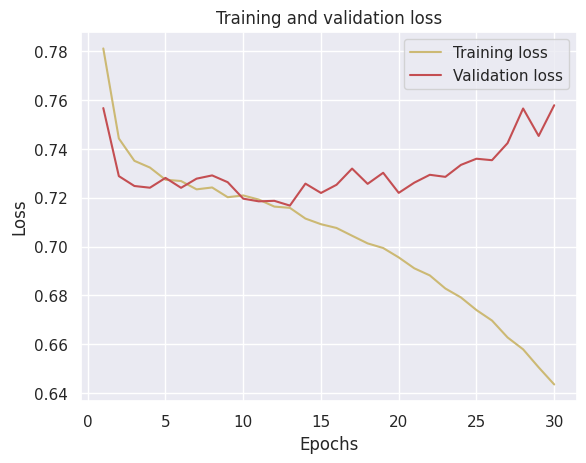

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

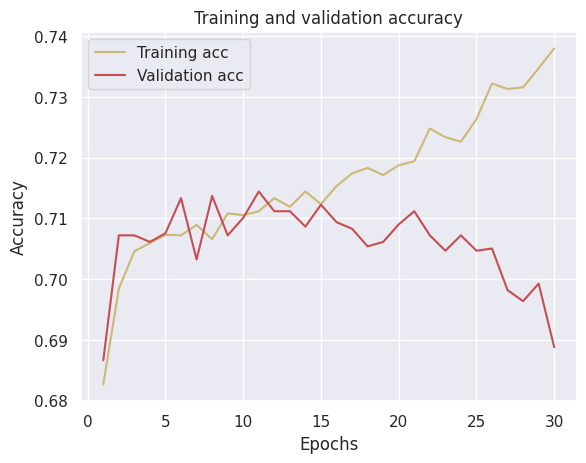

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [94]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

44/44 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.55      0.18      0.27       152
           1       0.72      0.96      0.82       971
           2       0.53      0.12      0.19       284

    accuracy                           0.71      1407
   macro avg       0.60      0.42      0.43      1407
weighted avg       0.66      0.71      0.64      1407

[[ 27 119   6]
 [ 14 934  23]
 [  8 243  33]]


In [96]:
input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm1 = LSTM(64)(conv1)

dens = Dense(32, activation='relu')(lstm1)
outputs = Dense(3, activation='softmax')(dens)

model = Model(inputs=input_layer, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 24)]         0         
                                                                 
 conv1d_11 (Conv1D)          (None, 148, 64)           4672      
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 3)                 99        
                                                                 
Total params: 39875 (155.76 KB)
Trainable params: 39875 (155.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/30
347/347 [==============================] - 5s 11ms/step - loss: 0.7842 - accuracy: 0.6840 - val_loss: 0.7589 - val_accuracy: 0.7004
Epoch 2/30
347/347 [==============================] - 3s 10ms/step - loss: 0.7445 - accuracy: 0.7041 - val_loss: 0.7419 - val_accuracy: 0.7040
Epoch 3/30
347/347 [==============================] - 3s 9ms/step - loss: 0.7367 - accuracy: 0.7049 - val_loss: 0.7337 - val_accuracy: 0.7072
Epoch 4/30
347/347 [==============================] - 4s 10ms/step - loss: 0.7327 - accuracy: 0.7060 - val_loss: 0.7231 - val_accuracy: 0.7119
Epoch 5/30
347/347 [==============================] - 3s 10ms/step - loss: 0.7292 - accuracy: 0.7060 - val_loss: 0.7296 - val_accuracy: 0.7097
Epoch 6/30
347/347 [==============================] - 3s 10ms/step - loss: 0.7267 - accuracy: 0.7073 - val_loss: 0.7236 - val_accuracy: 0.7090
Epoch 7/30
347/347 [==============================] - 3s 10ms/step - loss: 0.7260 - accuracy: 0.7085 - val_loss: 0.7193 - val_accuracy: 0.7123


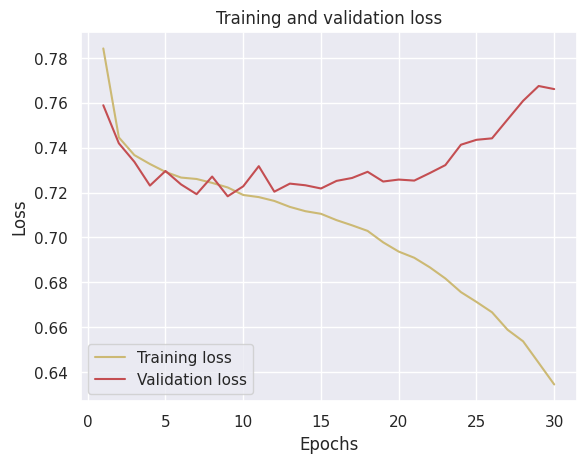

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

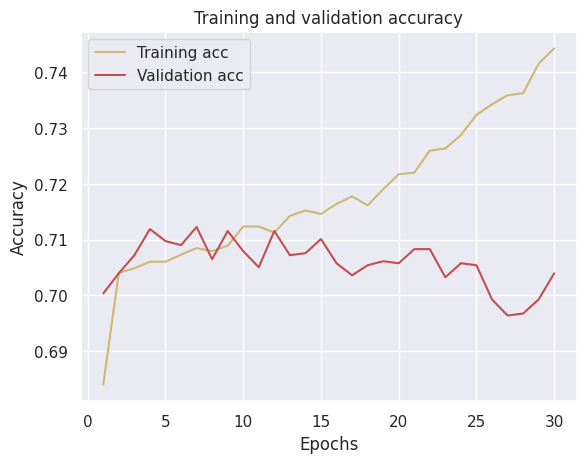

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [100]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

44/44 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.52      0.20      0.29       152
           1       0.75      0.92      0.83       971
           2       0.48      0.28      0.35       284

    accuracy                           0.71      1407
   macro avg       0.59      0.47      0.49      1407
weighted avg       0.67      0.71      0.67      1407

[[ 31  96  25]
 [ 19 893  59]
 [ 10 195  79]]


# 2-classification

In [101]:

for i in range(len(y)):
    y.replace(5, 1, inplace=True)

In [102]:
y.unique()

array([0, 1])

In [103]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [104]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 150)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 150)
print(X_test.shape, y_test.shape)

(13850, 150, 24) (13850,)
(1407, 150, 24) (1407,)


In [105]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [106]:
y_train_onehot = y_train_onehot.astype('float32')
y_test_onehot = y_test_onehot.astype('float32')

In [107]:
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv1D, Flatten, Dense

input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(2, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 150, 24)]         0         
                                                                 
 conv1d_12 (Conv1D)          (None, 148, 64)           4672      
                                                                 
 flatten_3 (Flatten)         (None, 9472)              0         
                                                                 
 dense_23 (Dense)            (None, 64)                606272    
                                                                 
 dense_24 (Dense)            (None, 2)                 130       
                                                                 
Total params: 611074 (2.33 MB)
Trainable params: 611074 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/30
347/347 [==============================] - 2s 4ms/step - loss: 0.3586 - accuracy: 0.8901 - val_loss: 0.3256 - val_accuracy: 0.8917
Epoch 2/30
347/347 [==============================] - 1s 3ms/step - loss: 0.2974 - accuracy: 0.9005 - val_loss: 0.3077 - val_accuracy: 0.8975
Epoch 3/30
347/347 [==============================] - 1s 3ms/step - loss: 0.2798 - accuracy: 0.9042 - val_loss: 0.3126 - val_accuracy: 0.8917
Epoch 4/30
347/347 [==============================] - 1s 3ms/step - loss: 0.2635 - accuracy: 0.9082 - val_loss: 0.3325 - val_accuracy: 0.8834
Epoch 5/30
347/347 [==============================] - 1s 3ms/step - loss: 0.2516 - accuracy: 0.9086 - val_loss: 0.3445 - val_accuracy: 0.8949
Epoch 6/30
347/347 [==============================] - 1s 3ms/step - loss: 0.2365 - accuracy: 0.9133 - val_loss: 0.3477 - val_accuracy: 0.8816
Epoch 7/30
347/347 [==============================] - 1s 3ms/step - loss: 0.2171 - accuracy: 0.9186 - val_loss: 0.3510 - val_accuracy: 0.8903
Epoch 

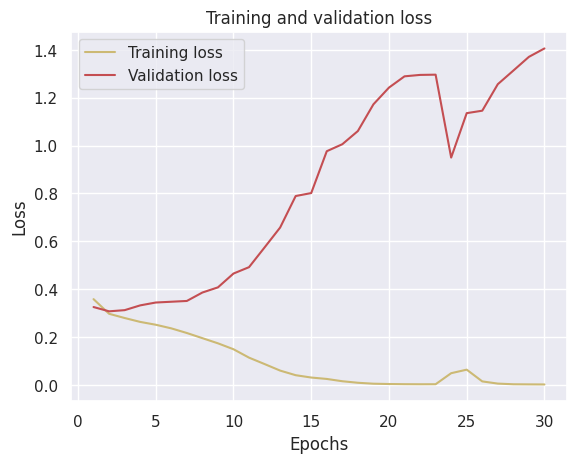

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

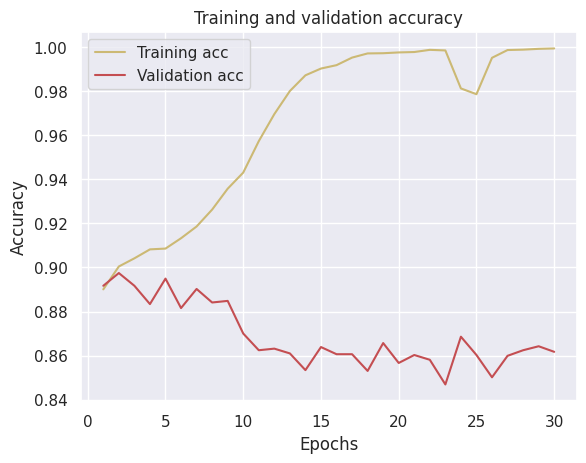

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [111]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.35      0.26      0.29       152
           1       0.91      0.94      0.93      1255

    accuracy                           0.87      1407
   macro avg       0.63      0.60      0.61      1407
weighted avg       0.85      0.87      0.86      1407

[[  39  113]
 [  74 1181]]


In [112]:
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv1D, Flatten, Dense
from keras.layers import Input, Conv1D, Flatten, Dense, LSTM

input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm = LSTM(64)(conv1)

dens = Dense(32, activation='relu')(lstm)
outputs = Dense(2, activation='sigmoid')(dens)

model = Model(inputs=input_layer, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 150, 24)]         0         
                                                                 
 conv1d_13 (Conv1D)          (None, 148, 64)           4672      
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 2)                 66        
                                                                 
Total params: 39842 (155.63 KB)
Trainable params: 39842 (155.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/30
347/347 [==============================] - 5s 11ms/step - loss: 0.3168 - accuracy: 0.8934 - val_loss: 0.2983 - val_accuracy: 0.8978
Epoch 2/30
347/347 [==============================] - 3s 9ms/step - loss: 0.2903 - accuracy: 0.9023 - val_loss: 0.2956 - val_accuracy: 0.8982
Epoch 3/30
347/347 [==============================] - 4s 10ms/step - loss: 0.2876 - accuracy: 0.9024 - val_loss: 0.2924 - val_accuracy: 0.8975
Epoch 4/30
347/347 [==============================] - 3s 10ms/step - loss: 0.2866 - accuracy: 0.9035 - val_loss: 0.2923 - val_accuracy: 0.8960
Epoch 5/30
347/347 [==============================] - 3s 9ms/step - loss: 0.2849 - accuracy: 0.9044 - val_loss: 0.2911 - val_accuracy: 0.8957
Epoch 6/30
347/347 [==============================] - 3s 10ms/step - loss: 0.2844 - accuracy: 0.9040 - val_loss: 0.2892 - val_accuracy: 0.8971
Epoch 7/30
347/347 [==============================] - 3s 10ms/step - loss: 0.2827 - accuracy: 0.9044 - val_loss: 0.2898 - val_accuracy: 0.8960
E

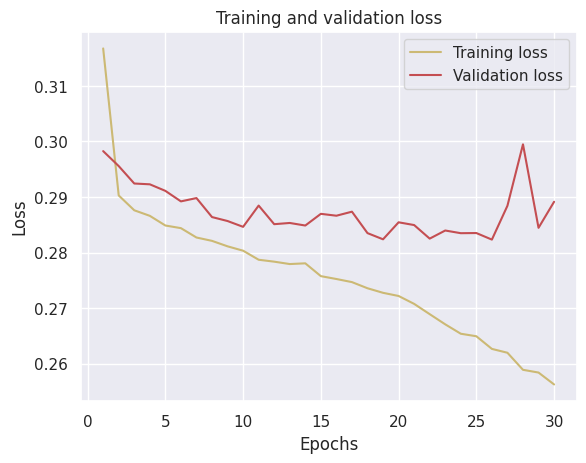

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

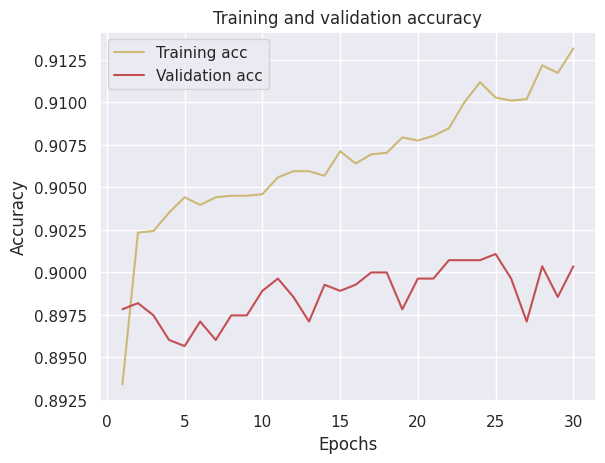

In [115]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [116]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

44/44 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.74      0.13      0.22       152
           1       0.90      0.99      0.95      1255

    accuracy                           0.90      1407
   macro avg       0.82      0.56      0.59      1407
weighted avg       0.89      0.90      0.87      1407

[[  20  132]
 [   7 1248]]


In [118]:
input_layer = Input(shape=(n_timesteps, n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
lstm1 = LSTM(64)(conv1)

dens = Dense(32, activation='relu')(lstm1)
outputs = Dense(2, activation='sigmoid')(dens)

model = Model(inputs=input_layer, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 150, 24)]         0         
                                                                 
 conv1d_15 (Conv1D)          (None, 148, 64)           4672      
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 2)                 66        
                                                                 
Total params: 39842 (155.63 KB)
Trainable params: 39842 (155.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/30
347/347 [==============================] - 6s 11ms/step - loss: 0.3135 - accuracy: 0.8951 - val_loss: 0.2980 - val_accuracy: 0.8964
Epoch 2/30
347/347 [==============================] - 3s 10ms/step - loss: 0.2893 - accuracy: 0.9019 - val_loss: 0.2944 - val_accuracy: 0.8960
Epoch 3/30
347/347 [==============================] - 4s 10ms/step - loss: 0.2864 - accuracy: 0.9037 - val_loss: 0.2958 - val_accuracy: 0.8986
Epoch 4/30
347/347 [==============================] - 3s 10ms/step - loss: 0.2853 - accuracy: 0.9035 - val_loss: 0.2902 - val_accuracy: 0.8978
Epoch 5/30
347/347 [==============================] - 4s 11ms/step - loss: 0.2849 - accuracy: 0.9039 - val_loss: 0.2898 - val_accuracy: 0.8975
Epoch 6/30
347/347 [==============================] - 4s 11ms/step - loss: 0.2837 - accuracy: 0.9032 - val_loss: 0.2889 - val_accuracy: 0.8964
Epoch 7/30
347/347 [==============================] - 4s 10ms/step - loss: 0.2834 - accuracy: 0.9047 - val_loss: 0.2888 - val_accuracy: 0.8986

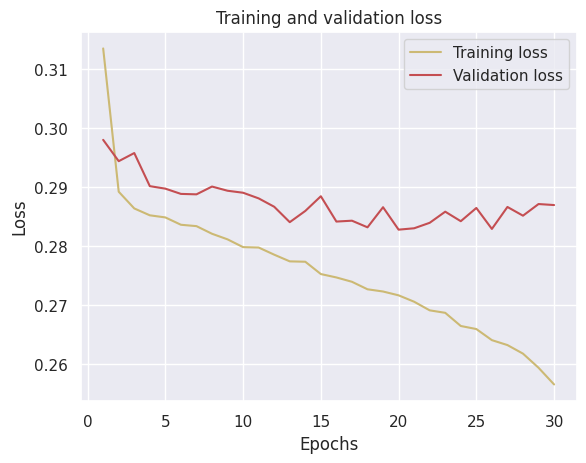

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

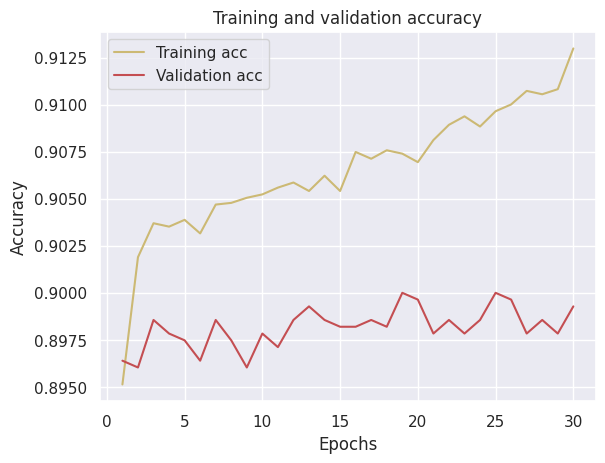

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [122]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

44/44 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.62      0.14      0.23       152
           1       0.90      0.99      0.95      1255

    accuracy                           0.90      1407
   macro avg       0.76      0.56      0.59      1407
weighted avg       0.87      0.90      0.87      1407

[[  21  131]
 [  13 1242]]
